In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
taxi_data = pd.read_csv('proceessed_data.csv')

In [3]:
taxi_data['tip_percentage'] = taxi_data['Tip_amount']/taxi_data['Fare_amount']
taxi_data['tip_percentage'].value_counts()

0.000000    880678
0.220000      7777
0.200000      7593
0.166667      6818
0.181818      5751
             ...  
0.269020         1
0.078983         1
0.225605         1
0.114074         1
0.225814         1
Name: tip_percentage, Length: 10118, dtype: int64

(array([888387.,  29477.,  54132.,  44736., 293858.,  99396.,  45407.,
         14459.,   4571.,   1080.]),
 array([0.        , 0.04973684, 0.09947368, 0.14921053, 0.19894737,
        0.24868421, 0.29842105, 0.34815789, 0.39789474, 0.44763158,
        0.49736842]),
 <a list of 10 Patch objects>)

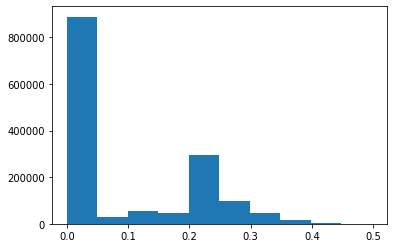

In [4]:
plt.hist(taxi_data[taxi_data['tip_percentage'] < 0.5 ]['tip_percentage'],bins = 10)

In [5]:
taxi_data['route'] = taxi_data.apply(lambda x: str(x.loc_id_Pickup) + '_' + str(x.loc_id_Dropoff),axis=1)
x_col = ['VendorID','RateCodeID','Passenger_count','Trip_distance','duration',\
         'Trip_type','Payment_type','pickup_week','pickup_hour','dropoff_hour','loc_id_Pickup','loc_id_Dropoff','route']
y_col = ['tip_percentage']

taxi_data_for_model = taxi_data[x_col + y_col]
taxi_data_for_model['duration'] = pd.to_timedelta(taxi_data_for_model['duration']).astype('int')/1000000000
taxi_data_for_model['pickup_week'] = taxi_data_for_model['pickup_week'].astype('str')
taxi_data_for_model['pickup_hour'] = taxi_data_for_model['pickup_hour'].astype('str')
taxi_data_for_model['dropoff_hour'] = taxi_data_for_model['dropoff_hour'].astype('str')

taxi_data_for_model.VendorID = taxi_data_for_model.VendorID.astype('str')
taxi_data_for_model.RateCodeID  = taxi_data_for_model.RateCodeID.astype('str')
taxi_data_for_model.Trip_type = taxi_data_for_model.Trip_type.astype('str')
taxi_data_for_model.Payment_type  = taxi_data_for_model.Payment_type.astype('str')

In [6]:
thres_order_num = 300
route_set = taxi_data_for_model['route'].value_counts()\
        [taxi_data_for_model['route'].value_counts()> thres_order_num].index
taxi_data_for_model.route = taxi_data_for_model.route.apply(lambda x: x if x in route_set else  'minor_route')

In [7]:
taxi_data_for_model_dummy = pd.get_dummies(taxi_data_for_model[x_col])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(taxi_data_for_model_dummy, taxi_data_for_model[y_col], test_size=0.2)

In [ ]:
import xgboost
model = xgboost.XGBRegressor(n_estimators =100, n_jobs = -1)
model.fit(X_train,y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds[preds <0] = 0

In [ ]:
np.square(np.subtract(y_test.values.reshape(1,-1),preds)).mean() 

In [ ]:
np.quantile(preds, 0.99)

In [39]:
y_test.values.reshape(1,-1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.21083333]])

In [51]:
model.feature_importances_

array([0.00616326, 0.00468824, 0.0050897 , ..., 0.00406556, 0.01481139,
       0.00196015], dtype=float32)

In [57]:
feature_df = pd.DataFrame()
feature_df['name'] = model._Booster.feature_names
feature_df['importance'] = model.feature_importances_

In [58]:
feature_df.sort_values('importance',ascending = False)[:20]

,name,importance
400,loc_id_Dropoff_193,0.140102
255,loc_id_Pickup_55,0.058972
37,pickup_hour_2,0.057964
236,loc_id_Pickup_37,0.037515
21,pickup_week_3,0.034143
509,loc_id_Dropoff_55,0.033106
261,loc_id_Pickup_61,0.030444
373,loc_id_Dropoff_169,0.026452
42,pickup_hour_3,0.024538
299,loc_id_Pickup_others,0.021222
